<a href="https://colab.research.google.com/github/HelennaYin/Camparison/blob/gh-pages/Proj1_ComparisionRF%26LocallyWeightedR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will compare the performance of random forest regressor and locally weighted regression on smaples with one variable. The dataset I choose for the purpose of this project is Boston Housing Prices. Mean Square Error is used to evaluate the accuracy of the two models. I will do a K fold cross validation on the result of the predictions made by each model. 

## Random Forest

Random Forest is an ensemble model made up of an ensemble of decision trees. It was first introduced in 1995 by Ho to address the problem of overfitting in deelpy grown decision tree model. 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data410/Non-linearReg/BostonHousingPrices.csv')

In [ ]:
data.head()

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001


We will use rooms(the number of rooms) as the independent varible (x) and cmedv(corrected median values of owner-occupied housing in USD 1000) as the dependent variable(y).

First, I want to plot x, y values in a 2-D space

In [ ]:
x = data['lstat'].values
y = data['cmedv'].values

In [ ]:
import matplotlib.pyplot as plt

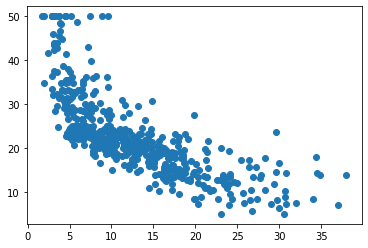

In [ ]:
plt.scatter(x,y)
plt.show()

To compare the accuracy of the models, I will use the crossvalidated mean square error between y and the predicted values of y. 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler as scale

In [ ]:
def DoKFold(model,X,y):
    
    mse_list = []
    kf = KFold(n_splits=10,random_state=123,shuffle = True)

    for idxtrain,idxtest in kf.split(X):
        Xtrain = X[idxtrain]
        Xtest = X[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
      
        model.fit(Xtrain,ytrain)
        mse_list.append(mse(ytest,model.predict(Xtest)))
        
    return np.mean(mse_list)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
X = x.reshape(-1,1)
mse_ = []
for d in range(2,5):
  model = RFR(max_depth = d,random_state=146)
  mse_.append(DoKFold(model,X,y))
print(mse_)

[28.28051989280913, 27.286248839501887, 28.46090080615098]
